In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pickle
pd.set_option("display.max_columns", 500)
import warnings
warnings.filterwarnings("ignore")

In [154]:
## Load the dataset
data=pd.read_json("SOIL_Krishi_response.json")
data = pd.DataFrame(data["results"].to_list())
data

,previousYield,organicCarbon,sampleID,pH,observationDateTime,phosphorus,cu,fe,cropNameCommon,surveyNumber,potassium,testDateTime,testCentreName,testCentreID,targetYield,previousCropName,boron,location,zn,sulphur,electricalConductivity,nitrogen,testCentreCode,id
0,0,0.90,62be810cbdd833001b342ff2,7.08,2022-07-01T05:07:24+05:30,28.3,0.39,7.74,chilli (rainfed),,319.0,2022-07-04T11:12:51+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,chilli (rainfed),0.33,"{'type': 'Polygon', 'coordinates': [[[80.00609...",0.74,20.8,0.33,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963
1,0,0.87,62a6f264cae407001390baf2,6.55,2022-06-13T08:16:36+05:30,29.3,0.41,3.45,chilli (irrigated),6,141.0,2022-07-06T06:38:03+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,cotton,0.17,"{'type': 'Polygon', 'coordinates': [[[79.97528...",0.53,19.2,0.56,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963
2,0,0.77,62a6f363d1047f0014afb3f9,6.31,2022-06-13T08:20:51+05:30,41.2,0.15,6.64,chilli (irrigated),218,191.0,2022-07-07T09:28:02+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,cotton,0.33,"{'type': 'Polygon', 'coordinates': [[[79.97741...",0.60,10.0,0.08,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963
3,0,0.66,62be8dbebdd833001b343d3b,8.07,2022-07-01T06:01:34+05:30,38.0,0.10,10.42,chilli (rainfed),,176.0,2022-07-07T11:11:51+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,chilli (rainfed),0.17,"{'type': 'Polygon', 'coordinates': [[[80.00258...",0.32,8.5,0.42,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963
4,0,0.79,62be9033f408e4001b60f1a4,8.09,2022-07-01T06:12:03+05:30,15.5,0.32,1.34,chilli (rainfed),,192.0,2022-07-08T03:27:05+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,chilli (irrigated),0.22,"{'type': 'Polygon', 'coordinates': [[[79.95783...",0.42,9.9,0.37,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,0,0.47,62c68682f6f36f001b928cba,8.09,2022-07-07T07:08:50+05:30,41.8,0.39,7.09,chilli (irrigated),,252.0,2022-07-09T03:02:53+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,chilli (irrigated),0.28,"{'coordinates': [[[79.9365838, 17.2184092], [7...",0.33,5.4,0.39,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963
3221,0,0.88,62c68a4bf6f36f001b9294d3,8.09,2022-07-07T07:24:59+05:30,24.8,0.22,8.18,chilli (irrigated),,72.0,2022-07-09T13:06:11+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,chilli (irrigated),0.22,"{'type': 'Polygon', 'coordinates': [[[79.95062...",0.30,4.9,0.41,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963
3222,0,0.90,62c68bd0f6f36f001b929ad3,8.18,2022-07-07T07:31:28+05:30,31.2,0.32,6.02,chilli (irrigated),,231.0,2022-07-09T10:46:53+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,chilli (irrigated),0.22,"{'coordinates': [[[79.96048126369715, 17.18041...",0.46,17.9,0.32,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963
3223,0,0.66,62c690ac4aaa3a001afd39fa,6.06,2022-07-07T07:52:12+05:30,19.5,0.22,8.42,chilli (irrigated),,336.0,2022-07-09T11:51:37+05:30,Raithu Vedika,6296fe392bca3f0013a31f9e,0,chilli (irrigated),0.22,"{'type': 'Polygon', 'coordinates': [[[79.95587...",0.18,4.5,0.30,None,digitalgreen00001,938f7c21-5a53-4d5e-988b-60d8f2e0c963


In [155]:
for col in data.columns:
    print(col.upper())
    if col!="location":
        print(data[col].unique(), data[col].nunique())

PREVIOUSYIELD
[    0  1825  2000 16000 16500 18502  1528  1254  1235  1250  1238  2500
  1500  1245  2300  1850  1625 12000  1200  1580 15000  1450 15285 15260
   850  1258  1243  2154  2548  1520 20000 25000 48000 60000] 34
ORGANICCARBON
[0.9  0.87 0.77 0.66 0.79 0.86 0.72 0.45 0.73  nan 0.8  0.56 0.49 0.62
 0.75 0.7  0.51 0.64 0.76 0.74 0.83 0.81 0.52 0.85 0.65 0.55 0.61 0.82
 0.5  0.48 0.88 0.58 0.69 0.84 0.67 0.57 0.46 0.53 0.91 0.54 1.1  0.47
 0.6  0.89 0.63 0.71 0.59 0.78 0.68] 48
SAMPLEID
['62be810cbdd833001b342ff2' '62a6f264cae407001390baf2'
 '62a6f363d1047f0014afb3f9' ... '62c68b714aaa3a001afd26eb'
 '62c68e144aaa3a001afd2ebc' '62c69027f6f36f001b92aeef'] 1075
PH
[7.08 6.55 6.31 8.07 8.09 6.02 6.04 6.07 6.1  6.98  nan 7.05 6.2  7.11
 8.   8.01 8.05 8.13 8.15 8.18 6.01 6.12 6.7  6.17 7.01 6.3  7.13 7.14
 7.15 8.04 5.5  8.36 5.4  7.9  7.32 6.   5.1  7.5  6.53 7.62 6.8  6.66
 5.8  5.6  7.   6.69 7.1  7.2  5.91 5.9  7.4  6.92 7.95 8.5  6.48 6.23
 7.3  6.4  8.1  7.46 6.25 6.91 7.6  5

In [156]:
# df.fillna(0)
df = data[['previousYield', 'organicCarbon', 'pH', 'phosphorus', 'cu', 'fe', 'cropNameCommon','potassium', 'targetYield',
         'previousCropName', 'boron', 'zn', 'sulphur', 'electricalConductivity', 'nitrogen',"id"]]
df["cropNameCommon"].unique()

array(['chilli (rainfed)', 'chilli (irrigated)', 'groundnut  (rainfed)',
       'sunflower (rainfed)', 'sunflower (irrigated)', 'bengal gram',
       'green gram', 'foxtail millet'], dtype=object)

In [157]:
nutrients = [ 'organicCarbon', 'pH', 'phosphorus', 'cu', 'fe','potassium', 'targetYield', 'boron', 'zn', 'sulphur',
       'electricalConductivity']
df[nutrients] = df[nutrients].fillna(df[nutrients].mean())
df["nitrogen"] = 0
df.isna().sum()

previousYield             0
organicCarbon             0
pH                        0
phosphorus                0
cu                        0
fe                        0
cropNameCommon            0
potassium                 0
targetYield               0
previousCropName          0
boron                     0
zn                        0
sulphur                   0
electricalConductivity    0
nitrogen                  0
id                        0
dtype: int64

In [158]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['cropNameCommon',"previousCropName"]
# print(df[cols_to_encode].isnull().sum())
# df[df["previousYield"].isna()]
print(df["cropNameCommon"].nunique())
print(df["previousCropName"].nunique())

ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap
# ohe = OneHotEncoder(sparse=False, drop='first')  # drop='first' avoids dummy variable trap
encoded_cols = ohe.fit_transform(df[cols_to_encode])
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(cols_to_encode))
encoded_df
print(df.shape, encoded_df.shape)
df.drop(cols_to_encode, axis=1, inplace=True)
print(df.shape, encoded_df.shape)

df.reset_index(inplace=True)
df.drop(["index", "id"], axis =1, inplace=True)

encoded_df.reset_index(inplace=True)
encoded_df.drop(["index"], axis=1, inplace=True)

with open('onehot_encoder.pkl','wb') as file:
    pickle.dump(ohe,file)

df = pd.concat([df, encoded_df], axis=1)
print(df.shape, encoded_df.shape)
df

8
13
(3225, 16) (3225, 19)
(3225, 14) (3225, 19)
(3225, 32) (3225, 19)


,previousYield,organicCarbon,pH,phosphorus,cu,fe,potassium,targetYield,boron,zn,sulphur,electricalConductivity,nitrogen,cropNameCommon_chilli (irrigated),cropNameCommon_chilli (rainfed),cropNameCommon_foxtail millet,cropNameCommon_green gram,cropNameCommon_groundnut (rainfed),cropNameCommon_sunflower (irrigated),cropNameCommon_sunflower (rainfed),previousCropName_chilli (rainfed),previousCropName_coriander,previousCropName_cotton,previousCropName_foxtail millet,previousCropName_green gram,previousCropName_groundnut (irrigated),previousCropName_maize,previousCropName_sorghum (irrigated),previousCropName_sorghum/jowar (irrigated),previousCropName_sunflower (irrigated),previousCropName_sunflower (rainfed),previousCropName_tomato
0,0,0.900000,7.080000,28.300000,0.390000,7.740000,319.000000,0,0.330000,0.740000,20.800000,0.33000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.870000,6.550000,29.300000,0.410000,3.450000,141.000000,0,0.170000,0.530000,19.200000,0.56000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.770000,6.310000,41.200000,0.150000,6.640000,191.000000,0,0.330000,0.600000,10.000000,0.08000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.660000,8.070000,38.000000,0.100000,10.420000,176.000000,0,0.170000,0.320000,8.500000,0.42000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.790000,8.090000,15.500000,0.320000,1.340000,192.000000,0,0.220000,0.420000,9.900000,0.37000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,0,0.470000,8.090000,41.800000,0.390000,7.090000,252.000000,0,0.280000,0.330000,5.400000,0.39000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3221,0,0.880000,8.090000,24.800000,0.220000,8.180000,72.000000,0,0.220000,0.300000,4.900000,0.41000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3222,0,0.900000,8.180000,31.200000,0.320000,6.020000,231.000000,0,0.220000,0.460000,17.900000,0.32000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3223,0,0.660000,6.060000,19.500000,0.220000,8.420000,336.000000,0,0.220000,0.180000,4.500000,0.30000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
df.to_csv("processed_df.csv")

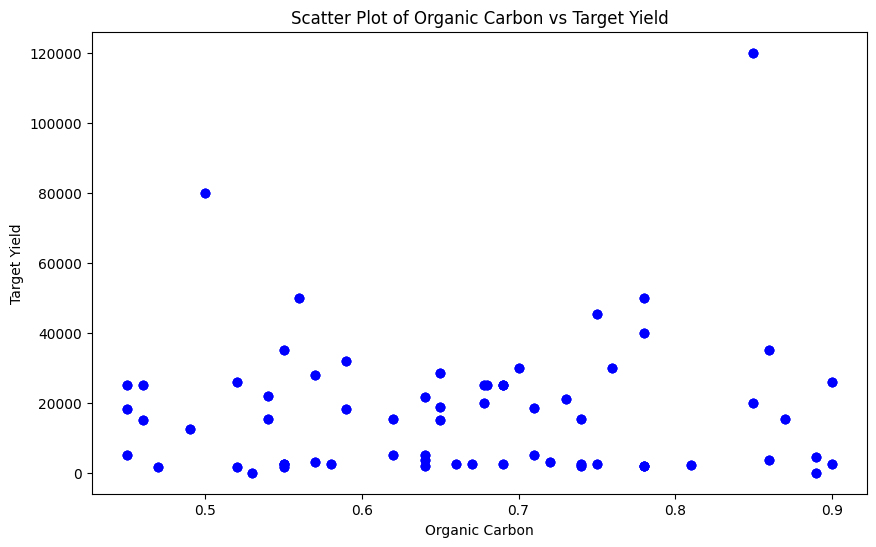

Correlation Matrix:
                                            previousYield  organicCarbon  \
previousYield                                    1.000000       0.143552   
organicCarbon                                    0.143552       1.000000   
pH                                               0.031427      -0.177655   
phosphorus                                       0.097563      -0.016712   
cu                                               0.034947       0.007804   
fe                                               0.102515       0.100782   
potassium                                       -0.168831      -0.036384   
targetYield                                      0.820478       0.059688   
boron                                           -0.149624       0.017902   
zn                                               0.205331       0.215692   
sulphur                                          0.110915      -0.076167   
electricalConductivity                           0.085312       0.15

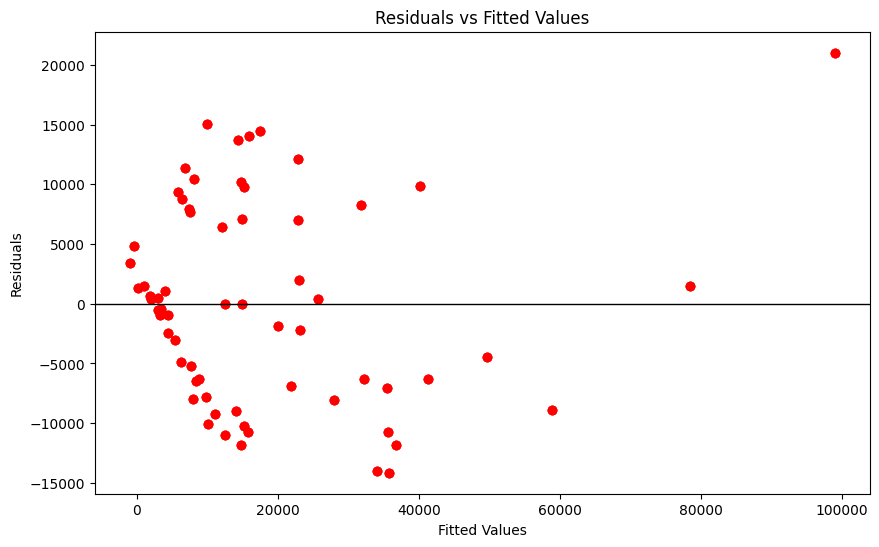

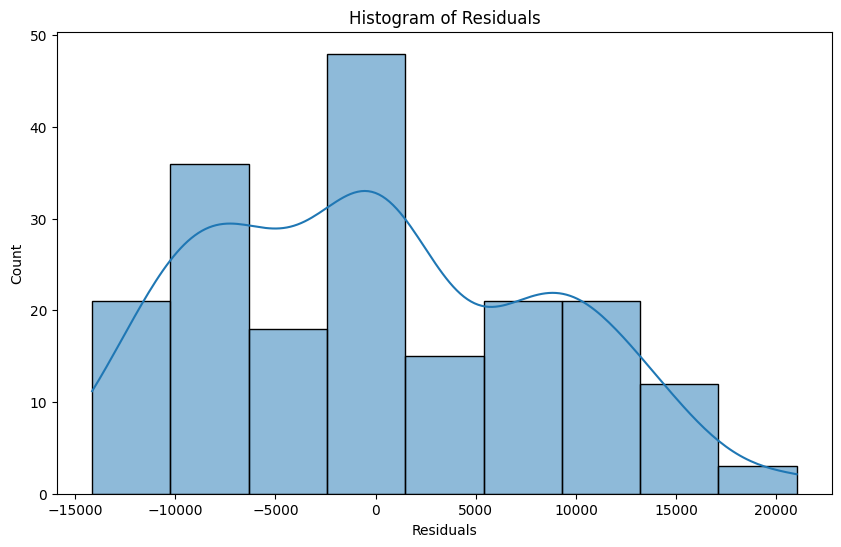

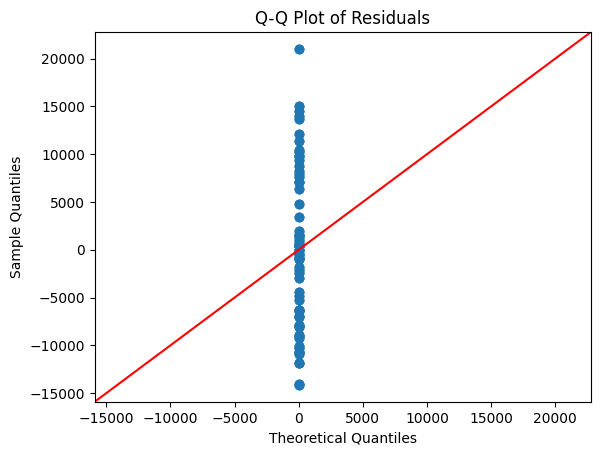

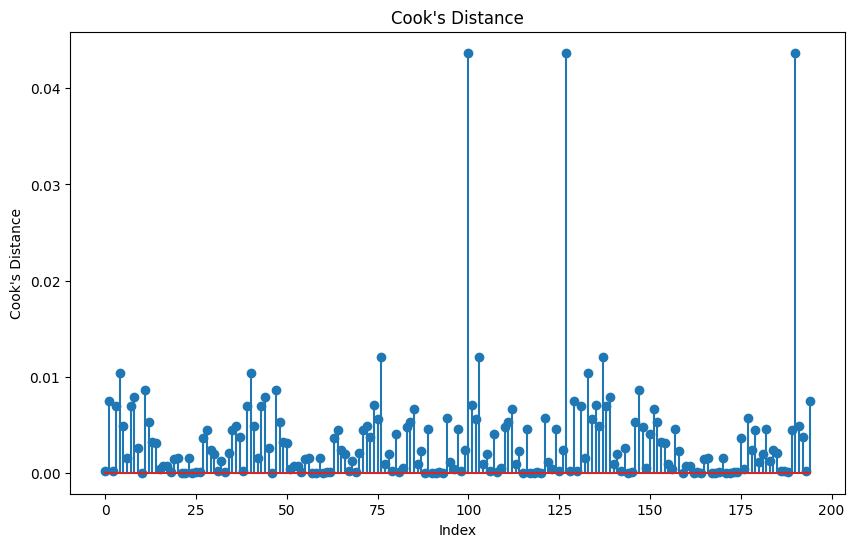

Cook's distance threshold: 0.02
Influential points: [100 127 190]


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

df = df[data["targetYield"]!=0]

# Separate features (X) and target (y)
X = df.drop(columns=['targetYield'])
y = df['targetYield']

# 1. Visualize the df (Scatter Plot with Target)
plt.figure(figsize=(10, 6))
plt.scatter(X['organicCarbon'], y, color='blue')
plt.title('Scatter Plot of Organic Carbon vs Target Yield')
plt.xlabel('Organic Carbon')
plt.ylabel('Target Yield')
plt.show()

# 2. Correlation Check
correlations = df.corr()
print("Correlation Matrix:")
print(correlations)

# 3. Fit a Linear Regression Model
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()
print("\nLinear Regression Model Summary:")
print(model.summary())

# 4. Residuals Analysis (Homoscedasticity)
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, color='red')
plt.axhline(0, color='black', linewidth=1)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 5. Histogram of Residuals (Normality Check)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# Q-Q plot for normality
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 6. Cook's Distance for Outlier Detection
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt="o")
plt.title("Cook's Distance")
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.show()

# Check threshold for influential points (e.g., 4/(n-k-1))
threshold = 4 / (len(X) - X.shape[1] - 1)
print(f"Cook's distance threshold: {threshold:.2f}")
influential_points = np.where(cooks_d > threshold)[0]
print(f'Influential points: {influential_points}')


# Viewing Residual Plot to check linearity of the dataset

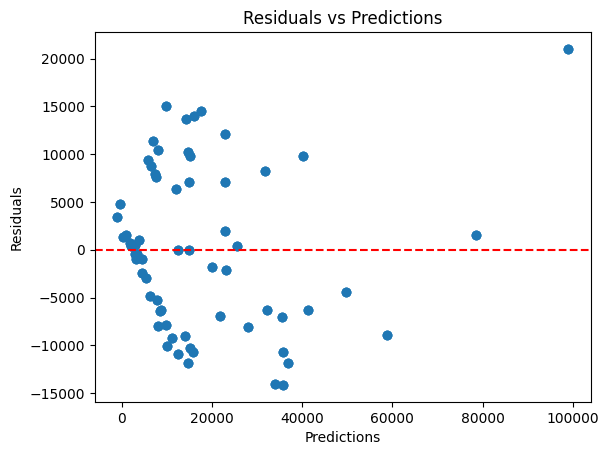

In [161]:
X = df.drop(["targetYield"], axis=1)  # Replace with feature(s) to check
y = df['targetYield']

model = LinearRegression().fit(X, y)
predictions = model.predict(X)

residuals = y - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

In [162]:
# The residual plot indicates that the relationship between the features and the target is likely non-linear because:

# Pattern in Residuals:

# The residuals do not appear randomly scattered around the horizontal line (at zero).
# There is a systematic curve (a clear U-shaped or inverted-U pattern), which suggests that a linear model is not fully capturing the relationship.
# Heteroscedasticity:

# The spread of residuals changes as predictions increase, indicating that the error variance is not constant.
# Next Steps
# Transform Features: Apply transformations like logarithm, square root, or polynomial features to better model the relationship.

# Try Non-Linear Models: Experiment with models like decision trees, random forests, or gradient boosting, which handle non-linear relationships better.

In [163]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_log = np.log1p(X)  # Ensure no negative or zero values in X
X_transformed = np.hstack([X_poly, X_log])

# Fit the model
linreg = LinearRegression()
linreg.fit(X_transformed, y)

# Evaluate using the same transformed features
y_pred = linreg.predict(X_transformed)
print("R-squared:", linreg.score(X_transformed, y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


R-squared: 1.0
RMSE: 5.4188156611467694e-05


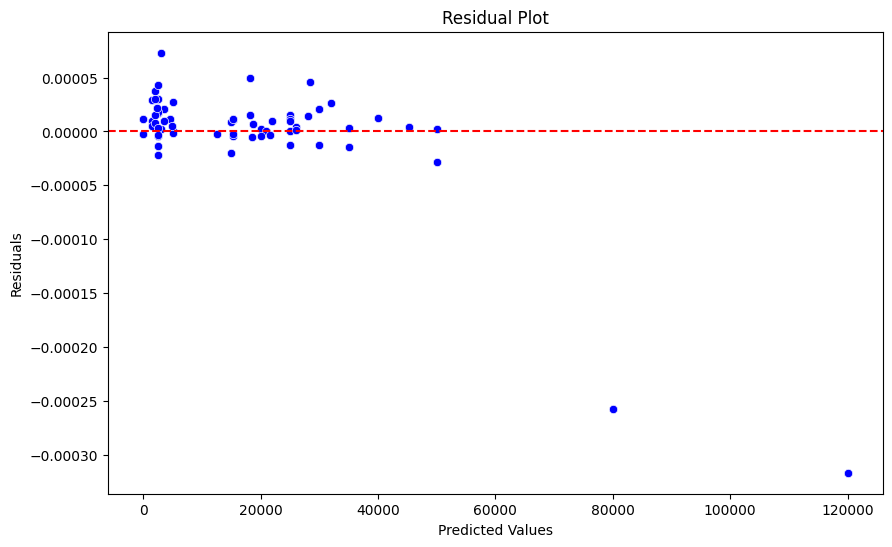

In [164]:
import seaborn as sns
residuals = y - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Train Test Split and Scaling Data

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

# Random Forest Regressor

In [166]:

from sklearn.ensemble import RandomForestRegressor
# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rf.predict(X_test)
print("Random Forest R-squared:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R-squared: 0.9762448055229628
Random Forest RMSE: 3378.6143321136997


# Gradient Boosting Regressor

In [167]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predict and Evaluate
y_pred = gbr.predict(X_test)
print("Gradient Boosting R-squared:", r2_score(y_test, y_pred))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Gradient Boosting R-squared: 0.9946949019750875
Gradient Boosting RMSE: 1596.63641960522


In [168]:
import pickle

# Save the model to a file
with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(gbr, file)

Choosing Gradient Boosting Regressor and performing hyperparameter tuning

In [169]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best RMSE: 6676.121576046243


Polynomial Linear Regression:
R-squared: 1.0 
RMSE: Very low (2.64e-05), indicating minimal error.
Implication: The model fits the training data very well, but you should validate its performance on a separate test set to check for overfitting.

Random Forest Regressor:
R-squared: 0.974
RMSE: 3551.71, which is considerably higher than the polynomial model.
Implication: The Random Forest model performs well but is less accurate than the polynomial regression. It is more robust and less prone to overfitting compared to a high-degree polynomial.

Gradient Boosting Regressor:
R-squared: 0.993 
RMSE: 1847.30, better than the Random Forest but not as low as the polynomial model.
Implication: The Gradient Boosting model also performs very well, balancing bias and variance effectively. It is typically more robust to overfitting compared to polynomial regression.

RMSE is very high after hyperparameter tuning -> With only 195 rows, hyperparameter tuning may overfit the cross-validation splits and fail to generalize to the whole dataset.

Thus choosing Gradient Boosting Regressor without hyperparameter tuning